<a href="https://colab.research.google.com/github/bhanvig/VisualStimuliResponseTime/blob/main/INF1340_FinalProject_Group11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the required methods and modules

#Basic Libraries
import pandas as pd
import numpy as np 

#FOr building the model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score ## to determine the R2 value of the model
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from collections import Counter

#for data visualization
import seaborn as sns ## to plot the scatter plots
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib inline  

**PART 1: DESCRIPTIVE ANALYSIS**

In this segment, we get the overview of the dataset by looking at the various columns and plotting histograms of the variables in the dataset. 
After that, we look into the effect of free time on alcohol consumption.
We also plot a pivot table to study the relationship between age, freetime and daily alcohol consumption





  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
Columns in the dataset Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', '

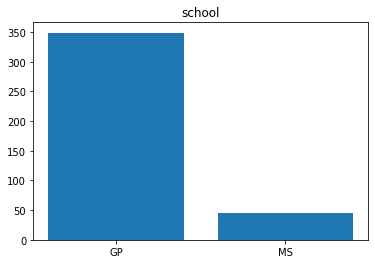

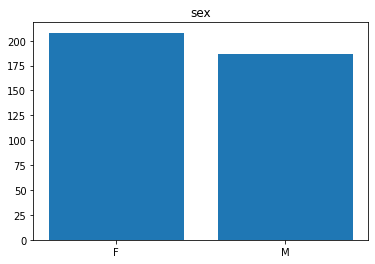

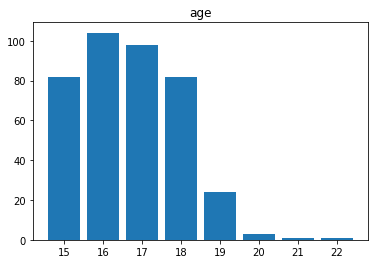

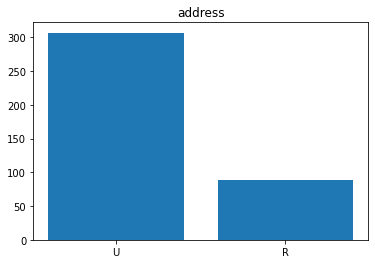

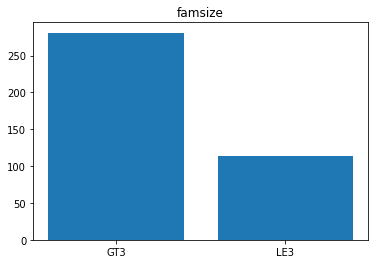

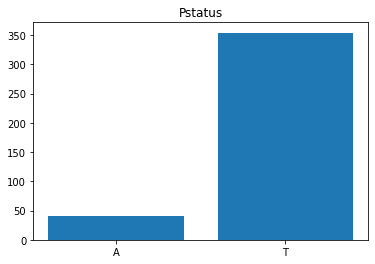

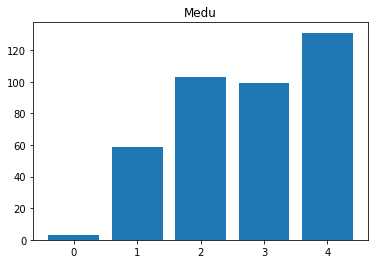

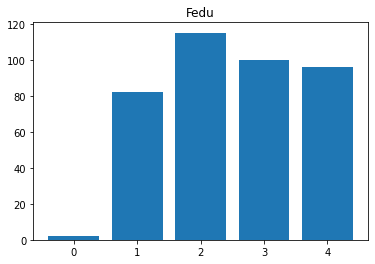

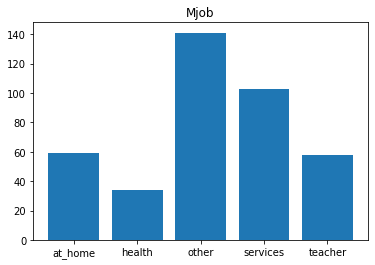

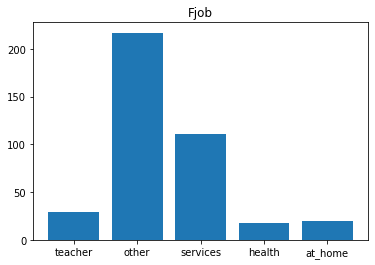

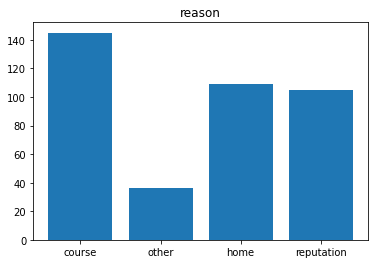

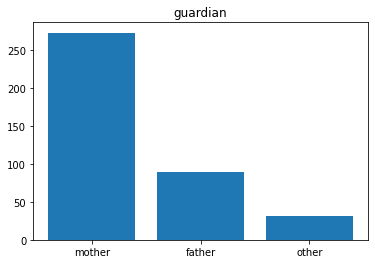

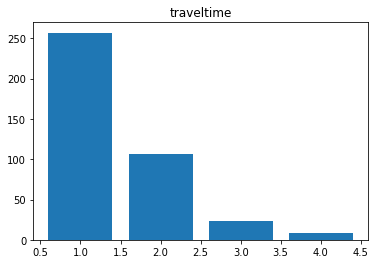

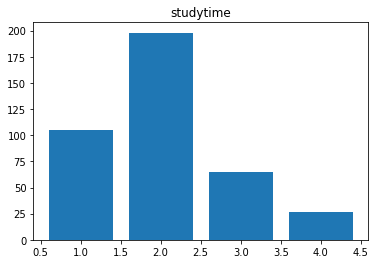

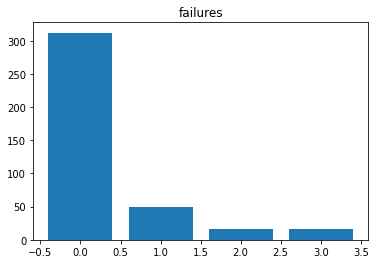

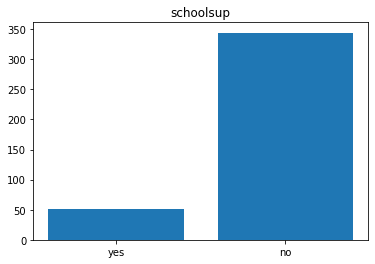

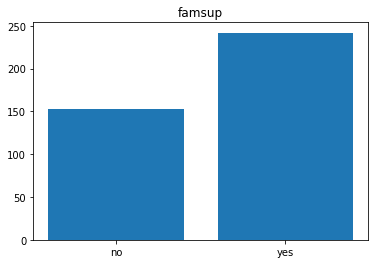

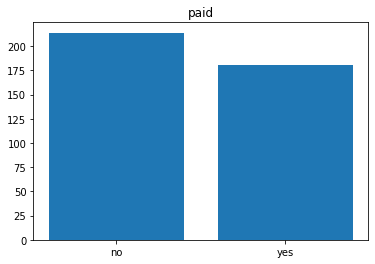

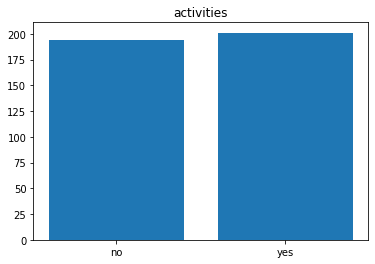

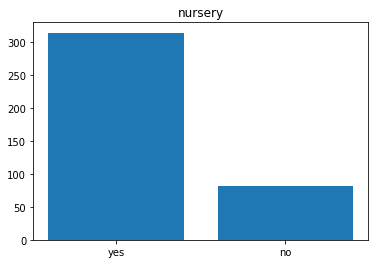

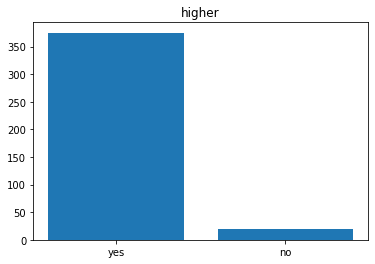

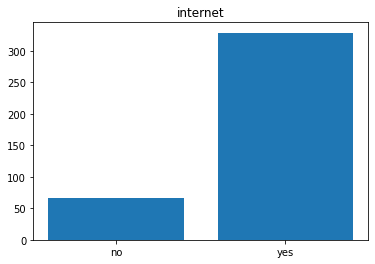

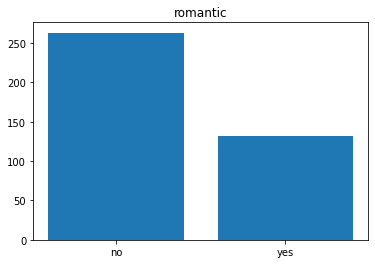

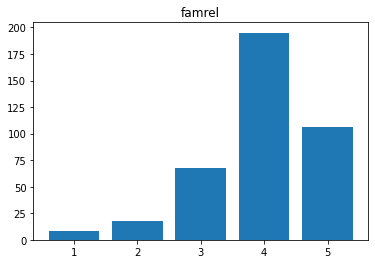

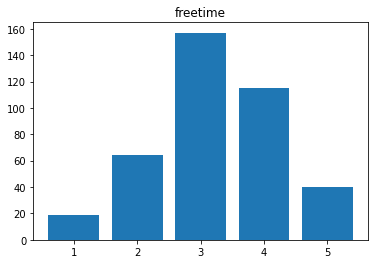

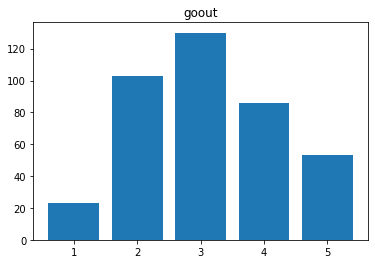

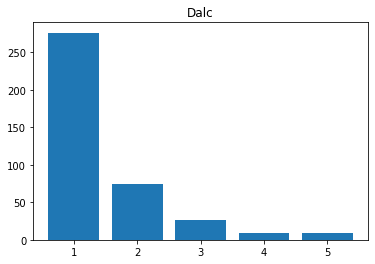

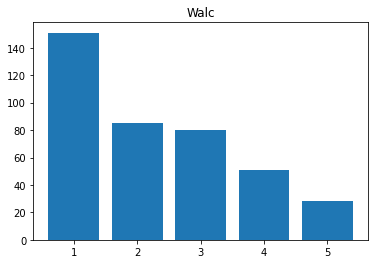

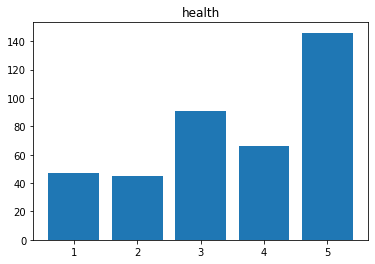

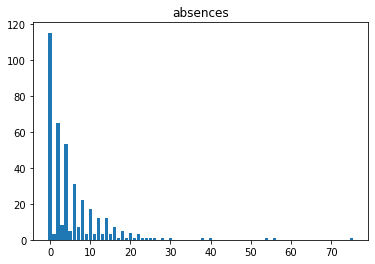

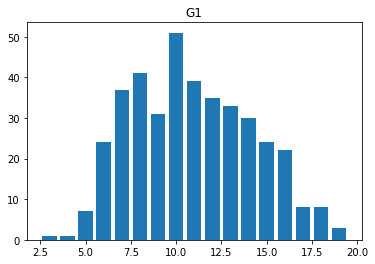

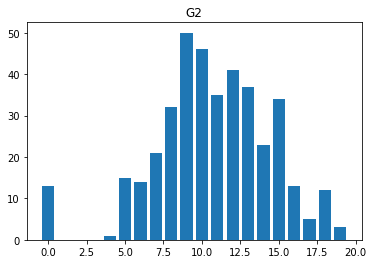

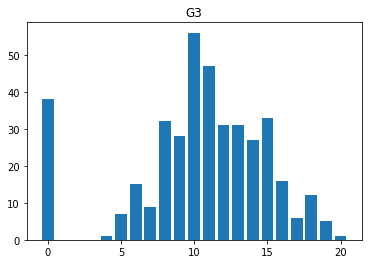

Text(233.67243641240296, 0.5, 'Age\n')

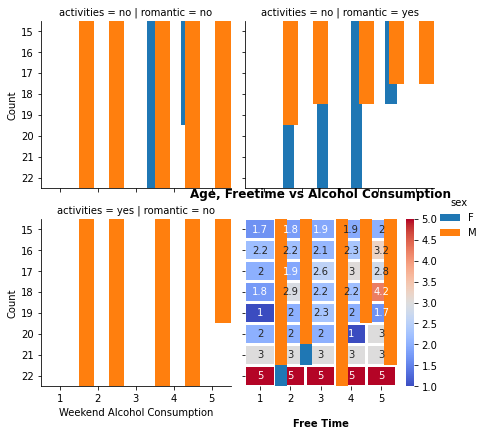

In [ ]:
# Load data into DataFrame
dataset_maths = pd.read_csv("Maths.csv")
column_collection={}
print(dataset_maths.head())
print("Columns in the dataset",dataset_maths.columns)


# Visualization Dataset Maths
def draw_bar(column, value, title):
    plt.bar(column, value)
    plt.title(title)
    plt.show()

#putting all conlumns which need to be visualized in a loop
for column in dataset_maths.columns:
    column_collection = dict(Counter(dataset_maths[column]))
    column_name = [name for name in column_collection]
    column_value = [column_collection[name] for name in column_collection]
    draw_bar(column_name, column_value, column)

#weekly alcohol consumption
#Weekend Alcohol Consumption & Freetime are a range from 1 - very low to 5 - very high

#Alcohol consumption is more for men than women
#It is shown that males with no extra curricular activities and romantic life tend to consume more
#alcohol than males with extra curricular activities and romantic life.
g = sns.FacetGrid(dataset_maths, col="romantic", row="activities",hue='sex')
g = g.map(plt.hist, "Walc").add_legend()
g.axes[0,0].set_ylabel('Count')
g.axes[1,0].set_ylabel('Count')
g.axes[1,1].set_xlabel('Weekend Alcohol Consumption')
g.axes[1,0].set_xlabel('Weekend Alcohol Consumption')

print()
#heatmap for analysing relationship between age, freetime and daily alcohol consumption
#Freetime increases alcohol consumption.
#Alot of freetime for underage students increases the alcohol consumption.
#Drinking age is 21; Therfore, there is a spike in drinking at the age of 22 as 
#it is legal for students to drink. 

number = dataset_maths.groupby("Dalc")["sex"].count()
as_matrix = dataset_maths.pivot_table(index="age", columns="freetime", values="Walc")
filler = dataset_maths.groupby("age")["Dalc"].mean()
as_matrix[as_matrix.index == 20] = as_matrix[as_matrix.index == 20].fillna(2)
as_matrix[as_matrix.index == 21] = as_matrix[as_matrix.index == 21].fillna(3)
as_matrix[as_matrix.index == 22] = as_matrix[as_matrix.index == 22].fillna(5)

sns.heatmap(as_matrix, cmap='coolwarm',linecolor='white',linewidths=2,annot=True)
plt.title("\nAge, Freetime vs Alcohol Consumption\n", weight="bold")
plt.xlabel("\nFree Time", weight="bold")
plt.ylabel("Age\n", weight="bold")


## **PART 2**: Single variable linear regression
The models below were created to evaluate whether a correlation exists between the following variables and the final student grade G3. 
- family relationship vs G3
- study time vs G3
- weekly alcohol intake vs G3
- health vs G3
- age vs G3
- school absences vs G3
- G1 (first period grade) vs G3
- G2 (second period grade) vs G3


Figure 1 R2:  0.0026382018264425877
Figure 2 R2:  0.009568691683847441
Figure 3 R2:  0.002697693350801833
Figure 4 R2:  0.003761933755432545
Figure 5 R2:  0.026107914829101686
Figure 6 R2:  0.0011728786634828126
Figure 7 R2:  0.6423508460522701
Figure 8 R2:  0.818786078004268


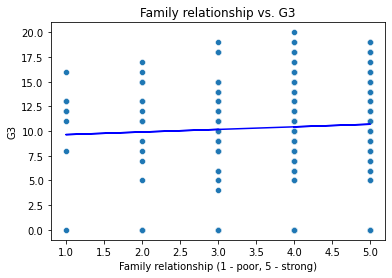

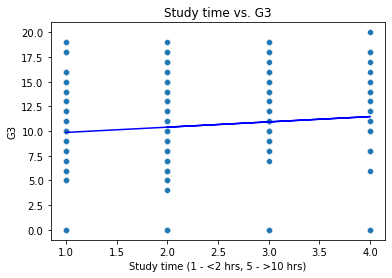

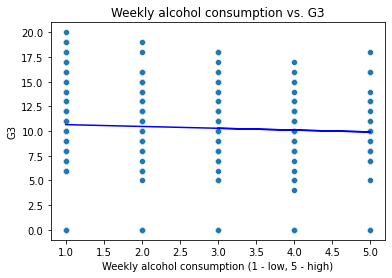

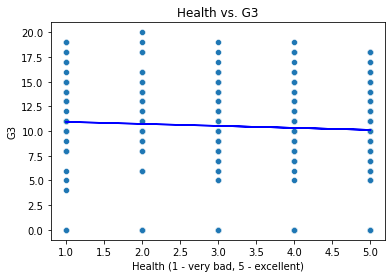

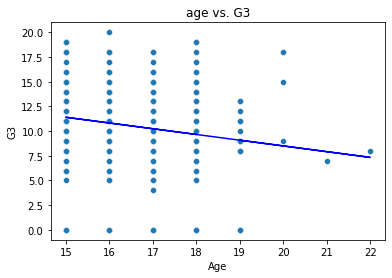

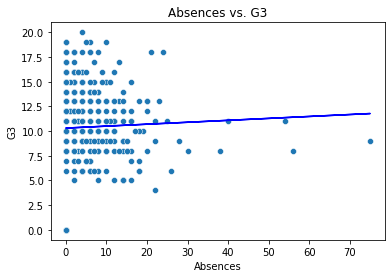

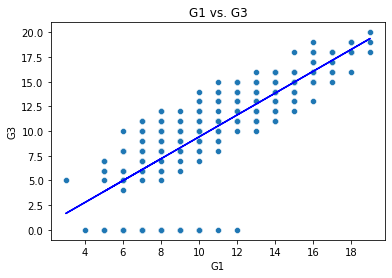

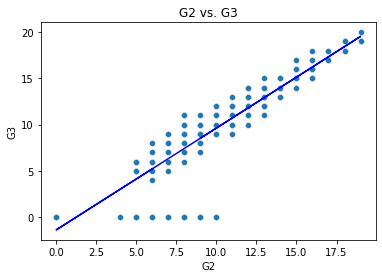

In [ ]:

df = pd.DataFrame(dataset_maths)

## Analyzing famrel vs G3
plt.figure(1)
plt.title("Family relationship vs. G3")
plt.xlabel("Family relationship (1 - poor, 5 - strong)")
axes = sns.scatterplot(data=df, x='famrel', y='G3', legend=False)

# Linear regression & plot the trendline
reg = linear_model.LinearRegression()
reg.fit(df[['famrel']], df.G3)
plt.plot(df.famrel, reg.predict(df[['famrel']]), color='blue')

# Determine the strength of the model
print("Figure 1 R2: ", r2_score(df.G3, reg.predict(df[['famrel']])))


## Analyzing study time vs G3##
plt.figure(2)
plt.title("Study time vs. G3")
plt.xlabel("Study time (1 - <2 hrs, 5 - >10 hrs)")
axes = sns.scatterplot(data=df, x='studytime', y='G3', legend=False)

# Linear regression & plot the trendline
reg2 = linear_model.LinearRegression()
reg2.fit(df[['studytime']], df.G3)
plt.plot(df.studytime, reg2.predict(df[['studytime']]), color='blue')

# Determine the strength of the model
print("Figure 2 R2: ", r2_score(df.G3, reg2.predict(df[['studytime']])))


## Analyzing Walc vs G3##

plt.figure(3)
plt.title("Weekly alcohol consumption vs. G3")
plt.xlabel("Weekly alcohol consumption (1 - low, 5 - high)")
axes = sns.scatterplot(data=df, x='Walc', y='G3', legend=False)

# Linear regression & plot the trendline
reg3 = linear_model.LinearRegression()
reg3.fit(df[['Walc']], df.G3)
plt.plot(df.Walc, reg3.predict(df[['Walc']]), color='blue')

# Determine the strength of the model
print("Figure 3 R2: ", r2_score(df.G3, reg3.predict(df[['Walc']])))


## Analyzing health vs G3##

plt.figure(4)
plt.title("Health vs. G3")
plt.xlabel("Health (1 - very bad, 5 - excellent)")
axes = sns.scatterplot(data=df, x='health', y='G3', legend=False)

# Linear regression & plot the trendline
reg4 = linear_model.LinearRegression()
reg4.fit(df[['health']], df.G3)
plt.plot(df.health, reg4.predict(df[['health']]), color='blue')

# Determine the strength of the model
print("Figure 4 R2: ", r2_score(df.G3, reg4.predict(df[['health']])))



## Analyzing age vs G3##

plt.figure(5)
plt.title("age vs. G3")
plt.xlabel("Age")
axes = sns.scatterplot(data=df, x='age', y='G3', legend=False)

# Linear regression & plot the trendline
reg5 = linear_model.LinearRegression()
reg5.fit(df[['age']], df.G3)
plt.plot(df.age, reg5.predict(df[['age']]), color='blue')

# Determine the strength of the model
print("Figure 5 R2: ", r2_score(df.G3, reg5.predict(df[['age']])))


## Analyzing absences vs G3##

plt.figure(6)
plt.title("Absences vs. G3")
plt.xlabel("Absences")
axes = sns.scatterplot(data=df, x='absences', y='G3', legend=False)

# Linear regression & plot the trendline
reg6 = linear_model.LinearRegression()
reg6.fit(df[['absences']], df.G3)
plt.plot(df.absences, reg6.predict(df[['absences']]), color='blue')

# Determine the strength of the model
print("Figure 6 R2: ", r2_score(df.G3, reg6.predict(df[['absences']])))


## Analyzing G1 vs G3##

# plot the scatter plot
plt.figure(7)
plt.title("G1 vs. G3")
axes = sns.scatterplot(data=df, x='G1', y='G3', legend=False)

# Linear regression & plot the trendline
reg7 = linear_model.LinearRegression()
reg7.fit(df[['G1']], df.G3)
plt.plot(df.G1, reg7.predict(df[['G1']]), color='blue')

# Determine the strength of the model
print("Figure 7 R2: ", r2_score(df.G3, reg7.predict(df[['G1']])))


## Analyzing G2 vs G3##

# plot the scatter plot
plt.figure(8)
plt.title("G2 vs. G3")
axes = sns.scatterplot(data=df, x='G2', y='G3', legend=False)

# Linear regression & plot the trendline
reg8 = linear_model.LinearRegression()
reg8.fit(df[['G2']], df.G3)
plt.plot(df.G2, reg8.predict(df[['G2']]), color='blue')

# Determine the strength of the model
print("Figure 8 R2: ", r2_score(df.G3, reg8.predict(df[['G2']])))

## **Part 2: Discussion:**
Based on the above, the marks of the first and second test have a direct correlation with the student's performance in the final test. The R^2 value for G1 vs G3 is 0.64 while G2 vs G3 is 0.84, suggesting there is a stronger correlation between G2 and G3 grades. External factors, such as health and family relationship, may all contribute to the G3 score but no direct correlation is observed between these variables and the final test grade as seen in the scatter plots above. This will be explored further in a multi-variable regression in Part 3. 

# **Part 3** : Collinearity and Multiple Linear Regression

These models were created to evaluate if multiple variables have correlation to predict the result of G3 scores. It evaluates what the impact of age, Walc, health, studytime and absences have on G3 (final score)? 


The Pearson correlation coefficient matrix for each indepndent variable: 
                 age      Walc    health  absences  studytime
age        1.000000  0.117276 -0.062187  0.175230  -0.004140
Walc       0.117276  1.000000  0.092476  0.136291  -0.253785
health    -0.062187  0.092476  1.000000 -0.029937  -0.075616
absences   0.175230  0.136291 -0.029937  1.000000  -0.062700
studytime -0.004140 -0.253785 -0.075616 -0.062700   1.000000


<ipython-input-5-19acfde68999>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)


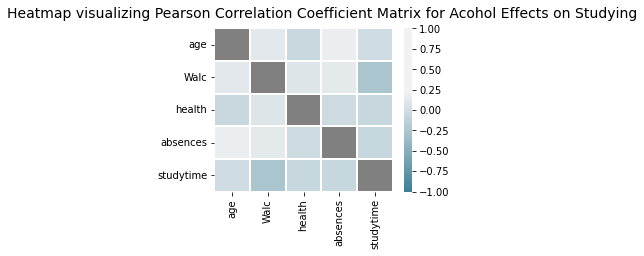

In [ ]:
#visualizing the collinearity between independent/ categorical factors using a heatmap 

corr = df[['age', 'Walc', 'health', 'absences', 'studytime']].corr()
print('The Pearson correlation coefficient matrix for each indepndent variable: \n', corr) 

#masking diagonal cells   
mask = np.zeros_like(corr, dtype = np.bool)  
np.fill_diagonal(mask, val = True)  
  
#setting the characteristics for the matplotlib figure  
figure, axis = plt.subplots(figsize = (4, 3))  
  
#creating a custom colormap  
c_map = sns.diverging_palette(223, 14, as_cmap = True, sep = 100)  
c_map.set_bad('grey')  
  
#showing the heatmap with the masking and the correct aspect ratio  
sns.heatmap(corr, mask = masking, cmap = c_map, vmin = -1, vmax = 1, center = 1, linewidths = 1)  
figure.suptitle('Heatmap visualizing Pearson Correlation Coefficient Matrix for Acohol Effects on Studying', fontsize = 14)  
axis.tick_params(axis = 'both', which = 'major', labelsize = 10)

# Discussion of 3 (Part A):
Each square on the Heatmap shows the correlation between the variables on each axis. Correlation scale ranges from -1 to +1. Values closer to 0 indicate there is no linear trend between the two variables, the more closer a variable is to +1, indicates there is more of a correlation. In this case, 'studytime' and 'WALC' seem to have more of a correlation compared to other variables. Another 2 variables that have more of a correlation are 'health' and 'age'. 

```
# This is formatted as code
```



Intercept: 20.138577617380456
Coefficients array: [0.26243946]


Text(0.5, 0.98, 'Multi-Linear Regression Model Visualization (R2 = 0.027211427335741223)')

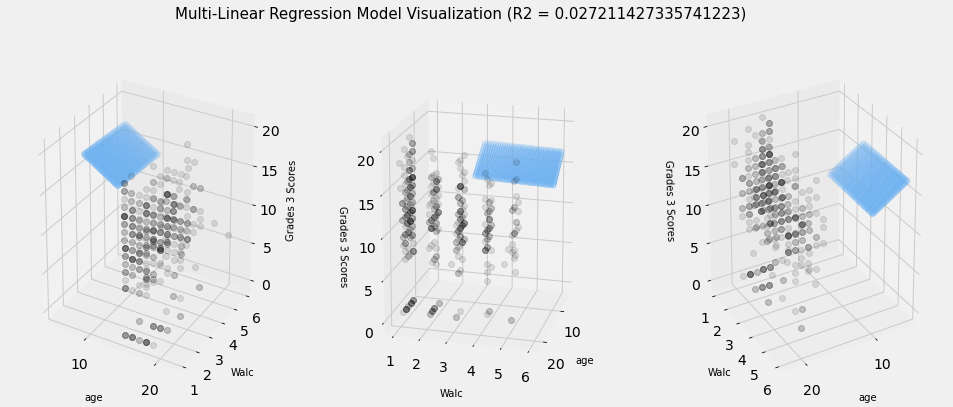

In [ ]:
#building the multiple linear Regression Model 
  
#setting the indepndent and dependent features 
independent = df[['studytime', 'Walc']].values.reshape(-1,2)  
dependent = df['G3'] 
  
# Creating a variable for each dimension  
x = independent[:, 0]  
y = independent[:, 1]  
z = dependent  
  
x_range = np.linspace(5, 10, 35)    
y_range = np.linspace(3, 6, 35)   
x1_range = np.linspace(3, 6, 35)  
x_range, y_range = np.meshgrid(x_range, y_range)  
viz = np.array([x_range.flatten(), y_range.flatten()]).T  
  
# Predicting price values using the linear regression model built above 
mlp = linear_model.LinearRegression()
model = mlp.fit(independent, dependent) 
predictions = model.predict(viz)  
  
# Evaluating the model using the R2 square of the model  
r2 = model.score(independent, dependent)

#Printing the intercept and the coefficients of the regression equation 
print('Intercept:', mlp.intercept_)
print('Coefficients array:', reg.coef_)

# Plotting a 3-D plot for visualizing the Multiple Linear Regression Model 

# Ploting the model for visualization  
plt.style.use('fivethirtyeight')  
  
# Initializing a matplotlib figure  
fig = plt.figure(figsize = (15, 6))  
  
axis1 = fig.add_subplot(131, projection = '3d')  
axis2 = fig.add_subplot(132, projection = '3d')  
axis3 = fig.add_subplot(133, projection = '3d')  
  
axes = [axis1, axis2, axis3]  
  
for ax in axes:  
    ax.plot(x, y, z, color='k', zorder = 10, linestyle = 'none', marker = 'o', alpha = 0.1)  
    ax.scatter(x_range.flatten(), y_range.flatten(), predictions, facecolor = (0,0,0,0), s = 20, edgecolor = '#70b3f0')  
    ax.set_xlabel('studytime', fontsize = 10, labelpad = 10)  
    ax.set_ylabel('Walc', fontsize = 10, labelpad = 10)  
    ax.set_zlabel('G3 Scores', fontsize = 10, labelpad = 10)  
    ax.locator_params(nbins = 3, axis = 'x')  
    ax.locator_params(nbins = 3, axis = 'x')  
  
axis1.view_init(elev=25, azim=-60)  
axis2.view_init(elev=15, azim=15)  
axis3.view_init(elev=25, azim=60)  
  
fig.suptitle(f'Multi-Linear Regression Model Visualization (R2 = {r2})', fontsize = 15, color = 'k') 